In [ ]:
# instalação da extensão openpyxl para abrir planilhas do excel
# para arquivos no formato xls ou xlsx
%pip install openpyxl

In [1]:
# importando as bibliotecas que serão utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import requests
from matplotlib.backends.backend_pdf import PdfPages

Carregando os arquivos VigiMed - notificações, reações e medicamentos

In [2]:
# abrindo os arquivos no formato csv
# o parâmetro enconding especifica a codificação do arquivo
# a não utilização do encoding leva a um erro, pois o arquivo contém palavras com acento
# as palavras com acento não são interprtadas com o codificador default 'UFT-8'
# para português podemos usar enconding = 'ISO-8859-1'
# caso o enconding não seja especificado, podemos ainda aplicar o parâmetro encoding_errors,
# que irá designar o que deve ser feito com os possíveis erros ('ignore', 'replace'...)
# para mais detalhes, ver a documentação do pandas: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv
notificacoes = pd.read_csv('VigiMed_Notificacoes.csv', sep=';', encoding='ISO-8859-1', engine='python')

In [3]:
# carregando o arquivo de reações
reacoes = pd.read_csv('VigiMed_Reacoes.csv', sep=';',
                           encoding='ISO-8859-1', engine='python')

In [4]:
# carregando o arquivo de medicamentos
# esse arquivo está apresentando um erro de espaçador,
# portanto, foi necessário utilizar o parâmetro 'on_bad_lines'
# on_bad_lines = 'warn' irá apenas apresentar um aviso das linhas que estão apresentando problema
# essas linhas serão puladas
# desse modo foi possível carregar o arquivo
medicamentos = pd.read_csv('VigiMed_Medicamentos.csv', sep=';',
                           encoding='ISO-8859-1', engine='python',
                           on_bad_lines='warn')

C:\Users\isabe\AppData\Local\Temp\ipykernel_17744\1131622584.py:7: ParserWarning: Skipping line 37556: ';' expected after '"'

  medicamentos = pd.read_csv('VigiMed_Medicamentos.csv', sep=';',
C:\Users\isabe\AppData\Local\Temp\ipykernel_17744\1131622584.py:7: ParserWarning: Skipping line 59029: ';' expected after '"'

  medicamentos = pd.read_csv('VigiMed_Medicamentos.csv', sep=';',
C:\Users\isabe\AppData\Local\Temp\ipykernel_17744\1131622584.py:7: ParserWarning: Skipping line 75745: ';' expected after '"'

  medicamentos = pd.read_csv('VigiMed_Medicamentos.csv', sep=';',
C:\Users\isabe\AppData\Local\Temp\ipykernel_17744\1131622584.py:7: ParserWarning: Skipping line 104260: ';' expected after '"'

  medicamentos = pd.read_csv('VigiMed_Medicamentos.csv', sep=';',
C:\Users\isabe\AppData\Local\Temp\ipykernel_17744\1131622584.py:7: ParserWarning: Skipping line 105741: ';' expected after '"'

  medicamentos = pd.read_csv('VigiMed_Medicamentos.csv', sep=';',
C:\Users\isabe\AppData\Local\Temp

Filtrando as colunas de intresse dos dataframes notificacoes, reacoes e medicamentos

In [5]:
notificacoes_filtrado = notificacoes[['IDENTIFICACAO_NOTIFICACAO', 'DATA_INCLUSAO_SISTEMA', 'DATA_NOTIFICACAO', 'TIPO_NOTIFICACAO', 'DATA_NASCIMENTO', 'IDADE_MOMENTO_REACAO', 'SEXO']]

In [6]:
reacoes_filtrado = reacoes[['IDENTIFICACAO_NOTIFICACAO', 'REACAO_EVTO_ADVERSO_MEDDRA_LLT', 'SOC', 'DURACAO', 'GRAVIDADE', 'DESFECHO']]

In [7]:
medicamentos_filtrado = medicamentos[['IDENTIFICACAO_NOTIFICACAO', 'RELACAO_MEDICAMENTO_EVENTO', 'NOME_MEDICAMENTO_WHODRUG', 'PRINCIPIOS_ATIVOS_WHODRUG',
                                      'CODIGO_ATC', 'CONCENTRACAO', 'ACAO_ADOTADA', 'INDICACAO_MEDDRA', 'INDICACAO_RELATADA_NOTIFICADOR_INICIAL',
                                      'DOSE', 'FREQUENCIA_DOSE', 'POSOLOGIA', 'DURACAO', 'FORMA_FARMACEUTICA', 'VIA_ADMINISTRACAO']]

Avaliação inicial do preenchimento das notificações

In [8]:
# Contagem de valores preenchidos e faltantes para o notificacoes
notificacoes_missing = notificacoes_filtrado.isnull().sum()
notificacoes_filled = notificacoes_filtrado.notnull().sum()
noti_missing_filled = pd.DataFrame({'Missing':notificacoes_missing, 'Filled':notificacoes_filled})

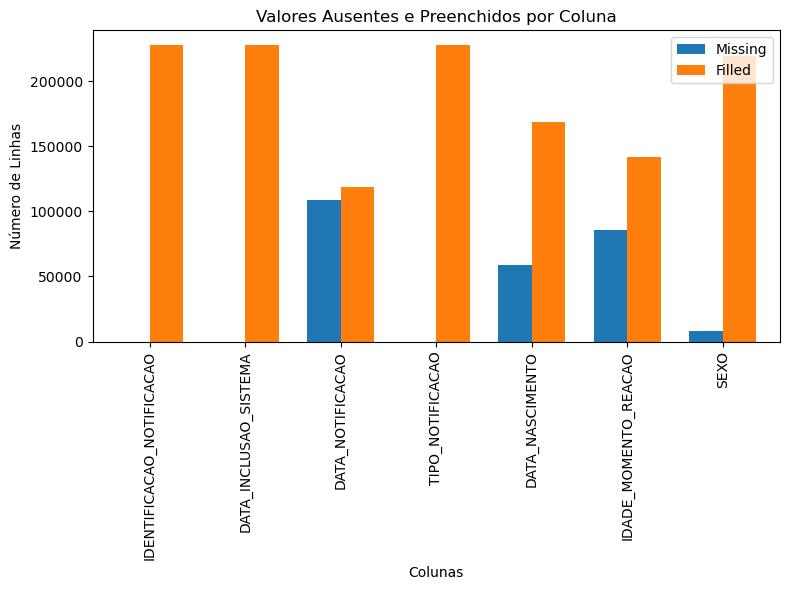

In [9]:
# Gráfico de barras
noti_missing_filled.plot(kind='bar', figsize=(8, 6), width=0.7)
plt.xlabel('Colunas')
plt.ylabel('Número de Linhas')
plt.title('Valores Ausentes e Preenchidos por Coluna')
plt.xticks(rotation=90)  # Deixa os rótulos das colunas na horizontal
plt.tight_layout()
plt.show()

In [10]:
# Contagem de valores preenchidos e faltantes para reacoes
reacoes_missing = reacoes_filtrado.isnull().sum()
reacoes_filled = reacoes_filtrado.notnull().sum()
reac_missing_filled = pd.DataFrame({'Missing':reacoes_missing, 'Filled':reacoes_filled})

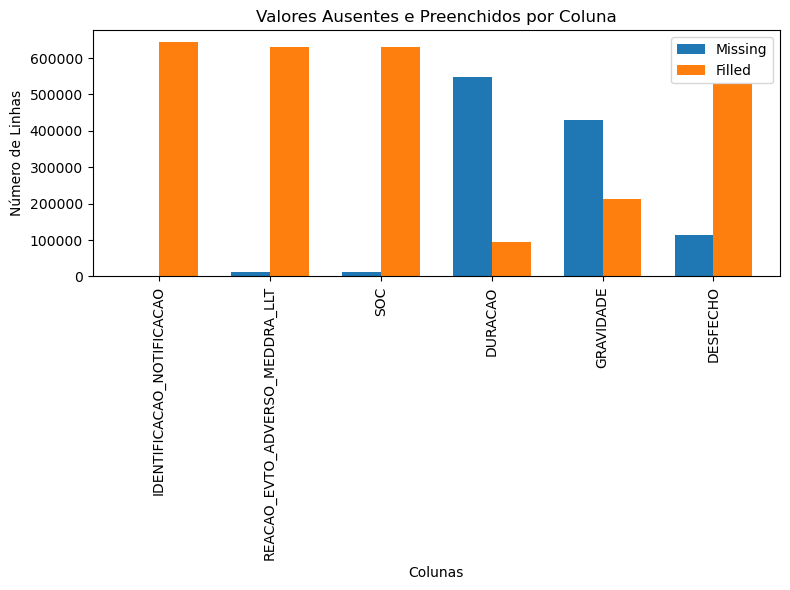

In [11]:
# Gráfico de barras
reac_missing_filled.plot(kind='bar', figsize=(8, 6), width=0.7)
plt.xlabel('Colunas')
plt.ylabel('Número de Linhas')
plt.title('Valores Ausentes e Preenchidos por Coluna')
plt.xticks(rotation=90)  # Deixa os rótulos das colunas na horizontal
plt.tight_layout()
plt.show()

In [12]:
# Contagem de valores preenchidos e faltantes para medicamentos
medicamentos_missing = medicamentos_filtrado.isnull().sum()
medicamentos_filled = medicamentos_filtrado.notnull().sum()
med_missing_filled = pd.DataFrame({'Missing':medicamentos_missing, 'Filled':medicamentos_filled})

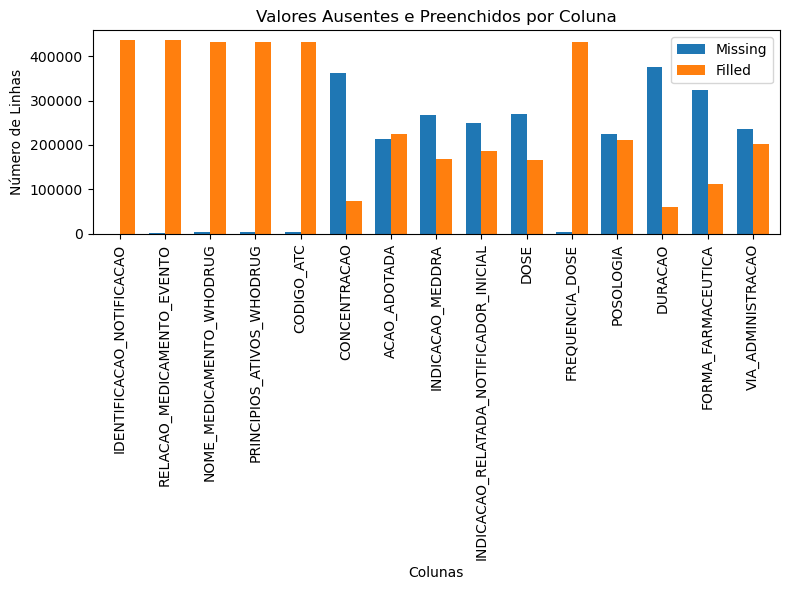

In [13]:
# Gráfico de barras
med_missing_filled.plot(kind='bar', figsize=(8, 6), width=0.7)
plt.xlabel('Colunas')
plt.ylabel('Número de Linhas')
plt.title('Valores Ausentes e Preenchidos por Coluna')
plt.xticks(rotation=90)  # Deixa os rótulos das colunas na horizontal
plt.tight_layout()
plt.show()

Salvando os gráficos em alta definição

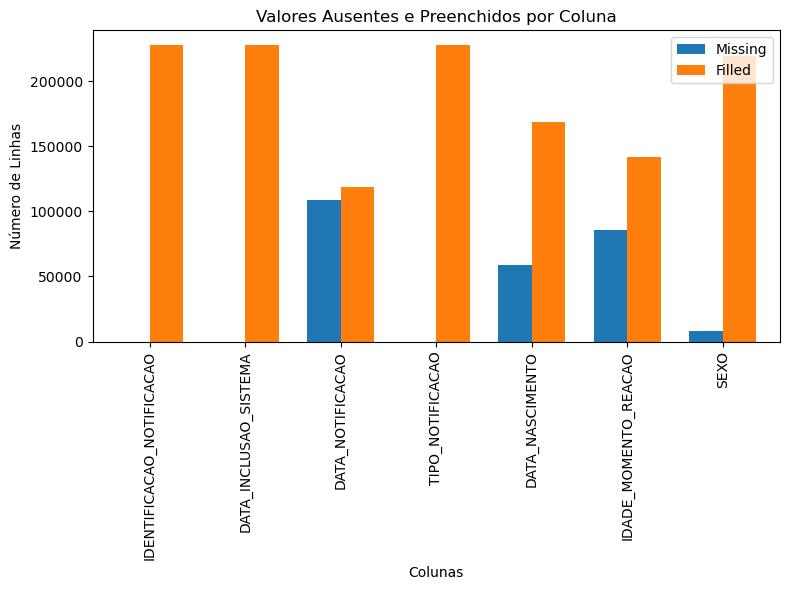

In [14]:
with PdfPages('notificacoes_missing_filled.pdf') as pp:
    noti_missing_filled.plot(kind='bar', figsize=(8, 6), width=0.7)
    plt.xlabel('Colunas')
    plt.ylabel('Número de Linhas')
    plt.title('Valores Ausentes e Preenchidos por Coluna')
    plt.xticks(rotation=90)  # Deixa os rótulos das colunas na horizontal
    plt.tight_layout()

    pp.savefig()

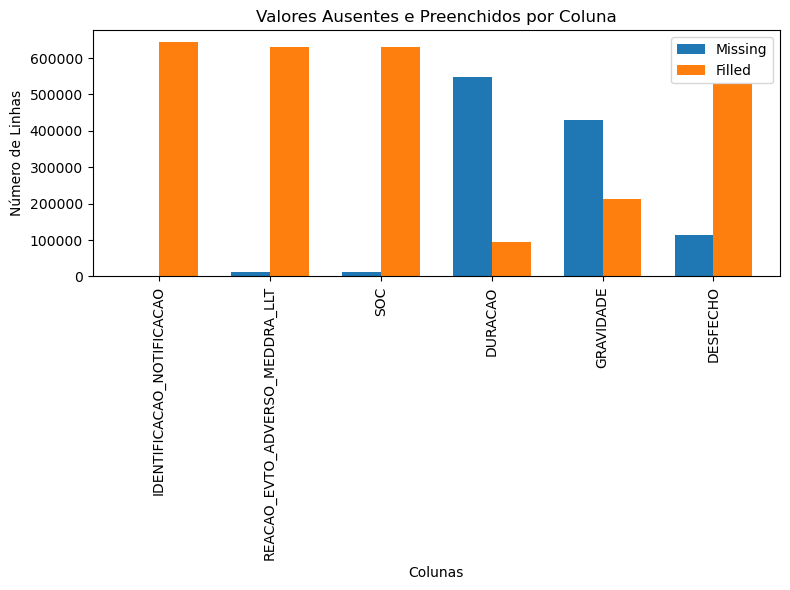

In [15]:
with PdfPages('reacoes_missing_filled.pdf') as pp:
    reac_missing_filled.plot(kind='bar', figsize=(8, 6), width=0.7)
    plt.xlabel('Colunas')
    plt.ylabel('Número de Linhas')
    plt.title('Valores Ausentes e Preenchidos por Coluna')
    plt.xticks(rotation=90)  # Deixa os rótulos das colunas na horizontal
    plt.tight_layout()
    
    pp.savefig()

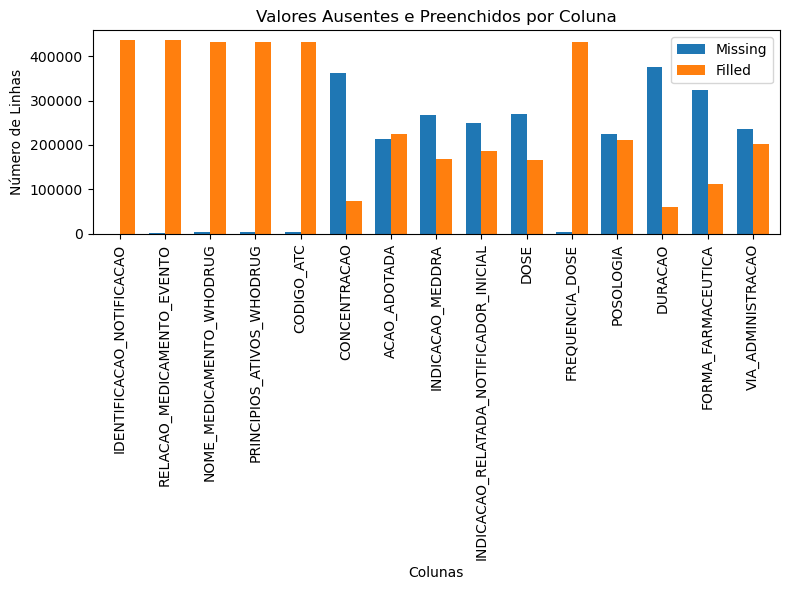

In [16]:
with PdfPages('medicamentos_missing_filled.pdf') as pp:
    med_missing_filled.plot(kind='bar', figsize=(8, 6), width=0.7)
    plt.xlabel('Colunas')
    plt.ylabel('Número de Linhas')
    plt.title('Valores Ausentes e Preenchidos por Coluna')
    plt.xticks(rotation=90)  # Deixa os rótulos das colunas na horizontal
    plt.tight_layout()
    
    pp.savefig()

Calaculando a data de nascimento dos pacientes

In [16]:
del notificacoes_filtrado

In [13]:
# Manter apenas os 4 primeiros dígitos (divisão inteira por 10.000)
notificacoes_filtrado.loc[:, 'DATA_INCLUSAO_SISTEMA'] = (notificacoes_filtrado['DATA_INCLUSAO_SISTEMA'] // 10000)
notificacoes_filtrado.loc[:, 'DATA_NASCIMENTO'] = (notificacoes_filtrado['DATA_NASCIMENTO'] // 10000)

In [14]:
# Adiciona uma coluna de idade calculada
notificacoes_filtrado.loc[:, 'IDADE'] = notificacoes_filtrado['DATA_INCLUSAO_SISTEMA'] - notificacoes_filtrado['DATA_NASCIMENTO']


C:\Users\isabe\AppData\Local\Temp\ipykernel_7140\2015464228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notificacoes_filtrado.loc[:, 'IDADE'] = notificacoes_filtrado['DATA_INCLUSAO_SISTEMA'] - notificacoes_filtrado['DATA_NASCIMENTO']


In [22]:
del dados_totais

In [23]:
# junção dos dados de reacoes e medicamentos
dados_totais = pd.merge(reacoes_filtrado, medicamentos_filtrado, on='IDENTIFICACAO_NOTIFICACAO', how='inner')

In [6]:
# adição dos dados de notifcacoes ao dataframe dados_totais
dados_totais = pd.merge(dados_totais, notificacoes, on='IDENTIFICACAO_NOTIFICACAO', how='outer')

In [ ]:
f = open("VigiMed_Medicamentos.csv", "r", encoding='ISO-8859-1') # modo leitura
conteudo = [item for item in f] # lembra se do list comprehension? Se não, volte a seção anterior
print(conteudo)

In [ ]:
conteudo.describe()

In [ ]:
# outra maneira de verificar linhas com erros no arquivo é utilizar
# o codigo abaixo para verificar algumas linhas do arquivo
# basta especificar um número de linhas em range()
# como o arquivo medicamentos é muito extenso, esse código nçao foi de muita ajuda
with open('VigiMed_Medicamentos.csv', 'r', encoding='ISO-8859-1') as file:
    for _ in range(10):  # Adjust the range to read more lines if necessary
        print(file.readline())


In [8]:
dados_totais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758763 entries, 0 to 1758762
Data columns (total 61 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   IDENTIFICACAO_NOTIFICACAO                     object 
 1   REACAO_EVTO_ADVERSO_MEDDRA_LLT                object 
 2   PT                                            object 
 3   HLT                                           object 
 4   HLGT                                          object 
 5   SOC                                           object 
 6   DATA_INICIO_HORA_x                            object 
 7   DATA_FINAL_HORA_x                             object 
 8   DURACAO_x                                     object 
 9   GRAVE_x                                       object 
 10  GRAVIDADE_x                                   object 
 11  DESFECHO_x                                    object 
 12  RELACAO_MEDICAMENTO_EVENTO_x                  object 
 1

Trabalhando com os dicionários

In [24]:
# carregando o dicionário dos medicamentos psicotropicos
psicotropicos = pd.read_excel('Medicamentos_registrados_psicotrópicos.xlsx')

In [26]:
# carregando o dicionário dos medicamentos antibióticos
antibioticos = pd.read_excel('Medicamentos_registrados_antibióticos.xlsx')

In [28]:
# carregando o dicionário das reações adversas
dic_ram = pd.read_excel('DicionárioRAM.xlsx')

In [12]:
# a função unique é utilizada para verificar valores, nesse caso nomes,
# únicos no data frame ou em determinada coluna
psicotropicos['Nome do Produto'].unique()

array(['ALFRON', 'ALPRAZOLAM', 'ALTROX', 'APRAZ', 'Alprazolam',
       'CONSTANTE', 'FRONTAL', 'FRONTAL XR', 'FRONTINOX', 'NEOZOLAM',
       'TEUFRON', 'TRANQUINAL', 'Tranquinal SLG', 'ZOLDAC', 'alprazolam',
       'ARROPLAM', 'DEPREVECTOR', 'SURVECTOR',
       'CLORIDRATO DE ANFEPRAMONA',
       'CLORIDRATO DE ANFEPRAMONA (PORT 344/98 LISTA',
       'CLORIDRATO DE ANFEPRAMONA (PORT. 344/98 LISTA B 2)', 'DUALID S',
       'HIPOFAGIN S', 'INIBEX S', 'cloridrato de anfepramona', 'NUVIGIL',
       'ATENTAH', 'STRATTERA', 'MALIASIN', 'ANSIOLEX', 'AZEPAM',
       'BROMALEX', 'BROMAX', 'BROMAZEPAM',
       'BROMAZEPAM (PORTARIA 344/98 - LISTA B1)', 'BROMOPIRIN',
       'BROMOXON', 'DEPTRAN', 'EDADE', 'FLUXTAR', 'LEXFAST', 'LEXMA',
       'LEXOTAN', 'LEZEPAN', 'LFM-BROMAZEPAM', 'NEURILAN', 'NOVAZEPAM',
       'RELAXIL', 'SOMALIUM', 'SULPAN', 'UNI-BROMAZEPAX', 'bromazepam',
       'cloridrato de cetamina', 'clortamina', 'FRISIUM', 'URBANIL',
       'CLONASUN', 'CLONAZEPAM', 'CLONAZEPAM (PORT. 

In [13]:
# filtrando os psicotropicos com registro válido
psicotropicos = psicotropicos.loc[psicotropicos['Situação']=='Válido']

In [31]:
# criando um dataframe com a coluna Nomes do dataframe psicotropicos
dic_psicotropicos = pd.melt(psicotropicos, value_vars=['Nome Base', 'Nome do Produto', 'Princípio Ativo'], var_name='column', value_name='combined')
# removendo a coluna com a categoria (de qual coluna do df psicotropicos veio) dos nomes
dic_psicotropicos.drop(columns=['column'], inplace=True)
# removendo os nomes repetidos
dic_psicotropicos.drop_duplicates(inplace=True)


In [33]:
# Removendo parte escrita entre ()
dic_psicotropicos['combined'] = dic_psicotropicos['combined'].str.replace(r'\s*\(.*\)\s*$', '', regex=True)

In [34]:
# Removendo parte escrita de linhas específicas
dic_psicotropicos.loc[668, 'combined'] = dic_psicotropicos.loc[668, 'combined'].replace(' (PORT 344/98 LISTA', '')
dic_psicotropicos.loc[1032, 'combined'] = dic_psicotropicos.loc[1032, 'combined'].replace(' - Port 344/98 - Lista B1', '')

In [36]:
# Removendo parte escrita de linhas específicas
dic_antibioticos.loc[286, 'combined'] = dic_antibioticos.loc[286, 'combined'].replace(' (2)', '')
dic_antibioticos.loc[465, 'combined'] = dic_antibioticos.loc[465, 'combined'].replace(' (2)', '')

In [38]:
# Removendo eventuais duplicatas e missing values
dic_psicotropicos.drop_duplicates(inplace=True)
dic_antibioticos.drop_duplicates(inplace=True)
dic_psicotropicos.dropna(inplace=True)
dic_antibioticos.dropna(inplace=True)


In [15]:
# utilizando a função info para avaliar as informações do dataframe
antibioticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3724 entries, 0 to 3723
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Unnamed: 0                                    3724 non-null   object
 1   Nome do Produto                               3724 non-null   object
 2   Princípio Ativo                               1159 non-null   object
 3   Registro                                      3724 non-null   int64 
 4   Processo                                      3724 non-null   object
 5   Nome da Empresa Detentora do Registro - CNPJ  3724 non-null   object
 6   Situação                                      3724 non-null   object
 7   Vencimento                                    3695 non-null   object
dtypes: int64(1), object(7)
memory usage: 232.9+ KB


In [29]:
antibioticos.rename(columns={'Unnamed: 0':'Nome Base'}, inplace=True)

In [17]:
# filtrando os antibioticos com registro válido
antibioticos = antibioticos.loc[antibioticos['Situação']=='Válido']

In [30]:
# criando um dataframe com a coluna Nomes do dataframe antibioticos
dic_antibioticos = pd.melt(antibioticos, value_vars=['Nome Base', 'Nome do Produto', 'Princípio Ativo'], var_name='column', value_name='combined')
# removendo a coluna com a categoria (de qual coluna do df psicotropicos veio) dos nomes
dic_antibioticos.drop(columns=['column'], inplace=True)
# removendo os nomes repetidos
dic_antibioticos.drop_duplicates(inplace=True)


In [19]:
# verificando se todos os medicamentos com registro válido selecionados ainda são válidos
antibioticos['Vencimento'].unique()

array(['08/2027', '02/2027', '03/2028', '09/2026', '05/2026', '01/2029',
       '10/2029', '08/2025', '03/2029', '04/2028', '02/2029', '11/2028',
       '03/2027', '10/2027', '04/2027', '07/2028', '05/2028', '01/2027',
       '07/2027', '12/2025', '09/2029', '04/2026', '02/2025', '04/2032',
       '08/2026', '05/2025', '05/2029', '05/2030', '12/2028', '11/2026',
       '12/2027', '08/2031', '06/2032', '01/2026', '09/2028', '08/2028',
       '06/2025', '07/2029', '08/2030', '12/2032', '05/2027', '07/2025',
       '11/2025', '12/2026', '02/2028', '06/2033', '05/2032', '06/2027',
       '06/2029', '08/2029', '10/2026', '05/2031', '04/2030', '10/2032',
       '01/2028', '06/2026', '03/2034', '05/2033', '12/2030', '09/2025',
       '06/2028', '04/2025', '02/2026', '10/2025', '09/2027', '04/2029',
       '04/2031', '10/2031', '03/2030', '02/2034', '07/2026', '11/2029',
       '03/2026', '11/2030', '02/2031', '02/2030', '07/2032', '10/2028',
       '06/2030', '03/2031', '03/2025', '09/2032', 

In [ ]:
# verificando se todos os medicamentos com registro válido selecionados ainda são válidos
psicotropicos['Vencimento'].unique()

In [20]:
# utilizando a função info para avaliar as informações do dataframe
notificacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227651 entries, 0 to 227650
Data columns (total 29 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   UF                                151047 non-null  object 
 1   TIPO_ENTRADA_VIGIMED              227581 non-null  object 
 2   RECEBIDO_DE                       188230 non-null  object 
 3   IDENTIFICACAO_NOTIFICACAO         227651 non-null  object 
 4   DATA_INCLUSAO_SISTEMA             227651 non-null  int64  
 5   DATA_ULTIMA_ATUALIZACAO           227594 non-null  float64
 6   DATA_NOTIFICACAO                  118914 non-null  float64
 7   TIPO_NOTIFICACAO                  227651 non-null  object 
 8   NOTIFICACAO_PARENT_CHILD          909 non-null     object 
 9   DATA_NASCIMENTO                   168777 non-null  float64
 10  IDADE_MOMENTO_REACAO              141761 non-null  object 
 11  GRUPO_IDADE                       88700 non-null   o

In [ ]:
# utilizando a função info para avaliar as informações do dataframe
reacoes.info()

In [ ]:
# utilizando a função info para avaliar as informações do dataframe
medicamentos.info()

In [21]:
# avaliação inicial das reações adversas
frequencia_reacoes = reacoes['REACAO_EVTO_ADVERSO_MEDDRA_LLT'].value_counts() # a função values_counts conta a frequência de cada termo
frequencia_reacoes_top10 = frequencia_reacoes[:10] # selecionando as 10 reções mais frequentes

In [23]:
frequencia_reacoes_top10.reset_index()

,REACAO_EVTO_ADVERSO_MEDDRA_LLT,count
0,Cefaleia,13465
1,Prurido,12173
2,Febre,11722
3,Náusea,11497
4,Diarreia,8565
5,Coceira,7747
6,Calafrios,6316
7,Vômito,6193
8,Medicamento ineficaz,6113
9,Dispneia,5832


<Axes: xlabel='count', ylabel='REACAO_EVTO_ADVERSO_MEDDRA_LLT'>

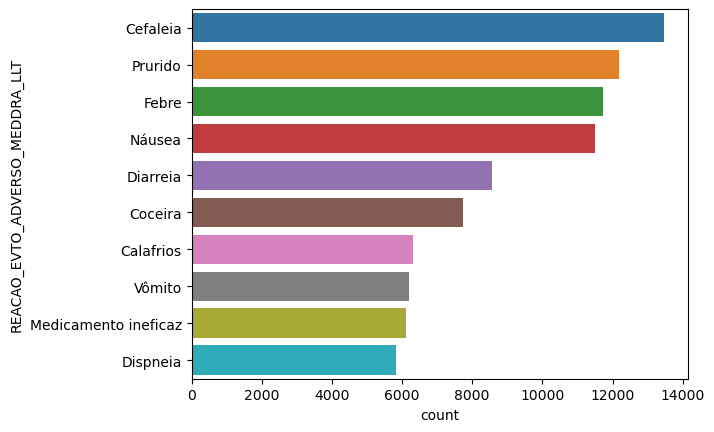

In [22]:
# criando um gráfico de barras, utilizando a biblioteca seaborn, para visualizar as 10 reações mais frequentes
sns.barplot(data=frequencia_reacoes_top10.reset_index(), x="count", y="REACAO_EVTO_ADVERSO_MEDDRA_LLT")